In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/workspaces/First-data-project/Kaggle Project/Data/Cleaned Data/df_cleaned.csv')

df['date'] = pd.to_datetime(df['date'])

- **Loading in the cleaned data file and making sure to convert the date column to datetime**

In [4]:
df = df.drop(columns = ['Unnamed: 0'])

- **Removing the 'Unnamed: 0' Column as it serves no relevance**

In [5]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,...,sqft_lot15,date,yr_renovated,zipcode,lat,long,view,waterfront,sale_month,decade_built
count,16375.000000,16375.000000,16375.000000,16375.000000,16375.000000,16375.000000,16375.000000,16375.000000,16375.000000,16375.000000,...,16375.000000,16375,16375.000000,16375.000000,16375.000000,16375.000000,16375.000000,16375.000000,16375.000000,16375.000000
mean,442472.321405,3.222595,1.960412,1795.179176,6874.934473,1.462809,3.410565,7.372031,1563.901313,231.277863,...,6809.344061,2014-10-29 23:51:38.748091392,67.134534,98082.491359,47.559051,-122.231877,0.120794,0.001038,6.577527,1964.748092
min,82000.000000,1.000000,0.500000,370.000000,520.000000,1.000000,2.000000,5.000000,370.000000,0.000000,...,651.000000,2014-05-02 00:00:00,0.000000,98001.000000,47.155900,-122.475000,0.000000,0.000000,1.000000,1900.000000
25%,300000.000000,3.000000,1.500000,1330.000000,4662.500000,1.000000,3.000000,7.000000,1130.000000,0.000000,...,4800.000000,2014-07-23 00:00:00,0.000000,98034.000000,47.468300,-122.339000,0.000000,0.000000,4.000000,1940.000000
50%,410500.000000,3.000000,2.000000,1730.000000,6947.000000,1.000000,3.000000,7.000000,1420.000000,0.000000,...,7035.000000,2014-10-17 00:00:00,0.000000,98074.000000,47.568300,-122.273000,0.000000,0.000000,6.000000,1970.000000
75%,554839.500000,4.000000,2.500000,2200.000000,8841.500000,2.000000,4.000000,8.000000,1890.000000,460.000000,...,8623.500000,2015-02-18 00:00:00,0.000000,98119.000000,47.681000,-122.156000,0.000000,0.000000,9.000000,1990.000000
max,993000.000000,5.000000,3.750000,3620.000000,16575.000000,3.000000,5.000000,10.000000,3340.000000,1280.000000,...,15586.000000,2015-05-24 00:00:00,2015.000000,98199.000000,47.777600,-121.315000,4.000000,1.000000,12.000000,2010.000000
std,180931.210577,0.795187,0.654022,604.077199,3171.778391,0.543955,0.643520,0.878318,588.009201,349.077011,...,2888.211838,NaN,359.797206,53.885474,0.139565,0.131808,0.523951,0.032205,3.120707,30.042045


- **The above code provides a summary of each column in the dataset. This summary includes key statistics such as the mean, the distribution of data across various quartiles, the count of data points, and the minimum and maximum values. It also includes the standard deviation, offering an overview of the data's spread.**

In [7]:
corr_matrix = df.corr()

price_correlations = corr_matrix['price'].abs().sort_values(ascending=False)
print(price_correlations)

price            1.000000
grade            0.546066
sqft_living      0.521301
lat              0.483746
sqft_living15    0.456696
sqft_above       0.406218
bathrooms        0.357516
floors           0.236486
bedrooms         0.235952
sqft_basement    0.217849
view             0.206887
sqft_lot15       0.096094
yr_renovated     0.095674
sqft_lot         0.083716
condition        0.060390
waterfront       0.043847
yr_built         0.030336
decade_built     0.028336
zipcode          0.026114
sale_month       0.015259
long             0.008057
date             0.003798
Name: price, dtype: float64


- **The project aims to understand the factors contributing to property prices. The correlation matrix compares the relationship between all other columns and the price column, indicating positive, negative, or neutral correlations. Notably, `grade`, `sqft_living` (square footage of living space), and `latitude` are the three attributes with the strongest positive impact on price.**

- **Although the number of bedrooms is often considered a significant factor in determining a house’s price, further analysis is warranted. The correlation matrix suggests that this relationship may not be as strong as commonly believed.**

- **Interestingly, the year a home was built appears to have a negative impact on price. This is evidenced by the negative correlation scores for `yr_built` and `decade_built` in the matrix.**


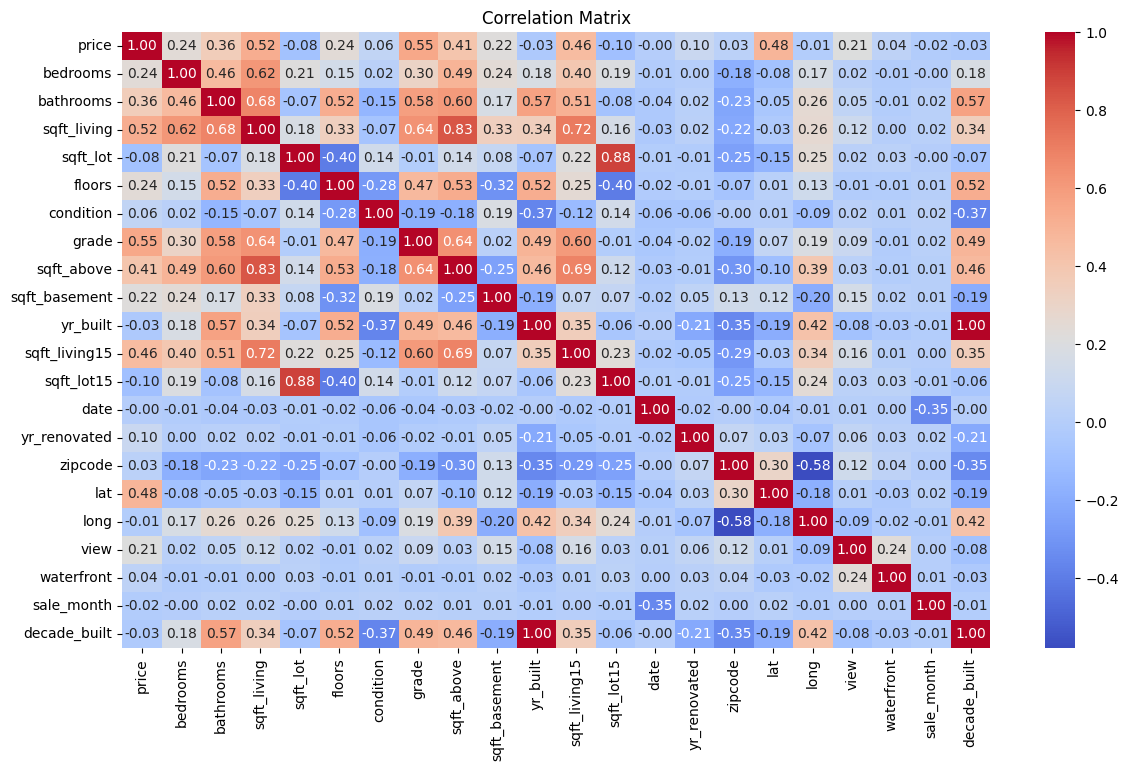

In [8]:
plt.figure(figsize=(14, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

- **The above diagram helps visualize all the relationships within the data. Strong relationships, such as those between `sqft_living` and `bedrooms`, align with our expectations. In contrast, the positive correlations for `bathrooms` and `yr_built` suggest that more recent properties tend to have more bathrooms, something that may not be as well known. This visualization is a simple yet effective tool for understanding the strength of relationships between different variables in our dataframe.**

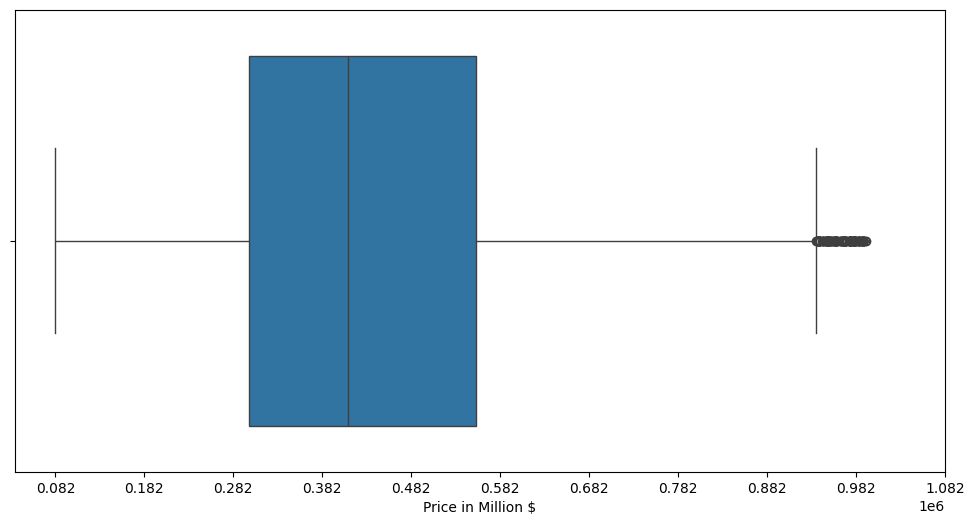

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

sns.boxplot(x=df['price'])

plt.xlabel('Price in Million $')

plt.xticks(ticks=range(int(df['price'].min()), int(df['price'].max()) + 100000, 100000))

plt.show()




- **The boxplot above visualizes the spread of house prices in this dataset.**

- **The boxplot is right-skewed, indicating that most of the data is concentrated in the lower price range. This suggests that the majority of house prices are near or below the median price, which, as shown by the descriptive statistics, is approximately $410,000.**

- **Above the median, the data is more dispersed, indicating that higher house prices are more varied and spaced out compared to lower prices.**

- **It is important to note that extreme outliers (prices over 3 standard deviations) were removed during the data cleaning process. These properties exhibited significant deviations from the rest of the data and could have introduced inconsistencies in the analysis.**
